In [1]:
from Controller import *
from plot import *

In [2]:
def Asum(MovementArray,DurationArray,Func,ylabel,Noise = 1e-16):
    SIZE = len(DurationArray)
    COLORLQG = "#F89D36"
    COLORILQG = "orange"
    COLORFL = "#8D99AE"
    fig,ax = plt.subplots(figsize = (10,10))

    for MovementLength in MovementArray:

        max_dev_FL = np.zeros(SIZE)
        max_dev_LQG = np.zeros(SIZE)
        max_dev_ILQG = np.zeros(SIZE)
        N = 10
        
        for idx,Duration in enumerate(DurationArray):
            
            for _ in range(N):
                XILQG,YILQG,_ = ILQG(Duration,1e6,1e6,1e-3,targets = [0,20+MovementLength],K = int(8000*Duration),start = [0,20],plot=False,Noise=True)
                XLQG,YLQG = LQG(Duration,1e6,1e6,1e6,1e6,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
                XFL,YFL = Feedback_Linearization(Duration,1e6,1e6,1e5,1e5,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
                
                max_dev_FL[idx] += Func(XFL,YFL)/N
                max_dev_LQG[idx] += Func(XLQG,YLQG)/N
                max_dev_ILQG[idx] += Func(XILQG,YILQG)/N
            print(idx)

        if MovementLength ==MovementArray[0]: 
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,label = "FL Controller",alpha = .3, linestyle = "--")
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG,label = "LQG Controller")
            plt.plot(DurationArray,max_dev_ILQG,color = COLORILQG,label = "ILQG Controller")
        
        else : 
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG)
            plt.plot(DurationArray,max_dev_ILQG,color = COLORILQG)
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,alpha = .3, linestyle = "--")
        ax.text(
            -0.03,
            max_dev_LQG[0],
            str(MovementLength)+" cm",
            color=COLORLQG,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
        )
        ax.text(
            2.23,
            max_dev_FL[-1],
            str(MovementLength)+" cm",
            color=COLORFL,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
            alpha = .3
        )
        ax.text(
            -0.03,
            max_dev_ILQG[-1],
            str(MovementLength)+" cm",
            color=COLORILQG,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
            alpha = .3
        )
    plt.title(ylabel + " of hand trajectories in function\n of movement time")
    plt.xlabel("Movement Time [seconds]")
    plt.ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

        # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")


    plt.legend()

from scipy.integrate import trapezoid

def Integration(x,y):
    x = np.abs(x)
    area = trapezoid(x,y)
    area = area/(14*14)
    return area

Total cost of LQG : 2746011
Total cost of FL: 214.227
Total cost of LQG : 9405715
Total cost of FL: 167.247
Total cost of LQG : 2216618
Total cost of FL: 241.384
Total cost of LQG : 1896097
Total cost of FL: 204.891
Total cost of LQG : 2180403
Total cost of FL: 863.017
Total cost of LQG : 3495019
Total cost of FL: 744.594
Total cost of LQG : 1123823
Total cost of FL: 294.087
Total cost of LQG : 1548938
Total cost of FL: 102.267
Total cost of LQG : 574689.
Total cost of FL: 172.075
Total cost of LQG : 7551767
Total cost of FL: 539.134
0
Total cost of LQG : 1017212
Total cost of FL: 76.2613
Total cost of LQG : 600412.
Total cost of FL: 842.651
Total cost of LQG : 694805.
Total cost of FL: 74.8774
Total cost of LQG : 745836.
Total cost of FL: 99.6310
Total cost of LQG : 1154739
Total cost of FL: 498.316
Total cost of LQG : 4680283
Total cost of FL: 160.736
Total cost of LQG : 1657756
Total cost of FL: 672.809
Total cost of LQG : 757541.
Total cost of FL: 224.353
Total cost of LQG : 524077

d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:494: RuntimeWarning: overflow encountered in matmul
  s[k] = q[k] + s[k+1] + 0.5*np.sum(cbold[k,:].T@S[k+1]@cbold[k,:]) - .5*gbold.T@Hinv@gbold
d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:494: RuntimeWarning: invalid value encountered in matmul
  s[k] = q[k] + s[k+1] + 0.5*np.sum(cbold[k,:].T@S[k+1]@cbold[k,:]) - .5*gbold.T@Hinv@gbold
d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:493: RuntimeWarning: overflow encountered in subtract
  sbold[k] = qbold[k]+A[k].T@sbold[k+1]-G.T@Hinv@gbold
d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:486: RuntimeWarning: invalid value encountered in matmul
  gbold = r[k] + B[k].T@sbold[k+1]+np.sum(C[k,:].T@S[k+1]@cbold[k,:])
d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:493: RuntimeWarning: invalid value encountered in matmul
  sbold[k] = qbold[k]+A[k].T@sbold[k+1]-G.T@Hinv@gbold
d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:492: RuntimeWarning: overflow encountered in matmul
  S[k] = Q[k] + A[k].T@S[

Total cost of LQG : 4216254
Total cost of FL: 88.7315
Total cost of LQG : 1004302
Total cost of FL: 129.401
Total cost of LQG : 8039949
Total cost of FL: 113.722
Total cost of LQG : 1709924
Total cost of FL: 47.6821
Total cost of LQG : 9096748
Total cost of FL: 116.937
Total cost of LQG : 2292614
Total cost of FL: 102.429
Total cost of LQG : 2608411
Total cost of FL: 42.2116
Total cost of LQG : 5721761
Total cost of FL: 146.770
Total cost of LQG : 6825601
Total cost of FL: 6.16932
Total cost of LQG : 9872367
Total cost of FL: 116.600
8
Total cost of LQG : 3994583
Total cost of FL: 12.9296


d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:492: RuntimeWarning: overflow encountered in subtract
  S[k] = Q[k] + A[k].T@S[k+1]@A[k]-G.T@Hinv@G


Total cost of LQG : 4091614
Total cost of FL: 82.3758
Total cost of LQG : 3434619
Total cost of FL: 167.958
Total cost of LQG : 6528776
Total cost of FL: 54.0868
Total cost of LQG : 5516042
Total cost of FL: 0.41795
Total cost of LQG : 6683325
Total cost of FL: 10.9338
Total cost of LQG : 7903403
Total cost of FL: 75.2452
Total cost of LQG : 2926997
Total cost of FL: 60.8789
Total cost of LQG : 1236558
Total cost of FL: 22.6441
Total cost of LQG : 7268667
Total cost of FL: 163.465
9


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


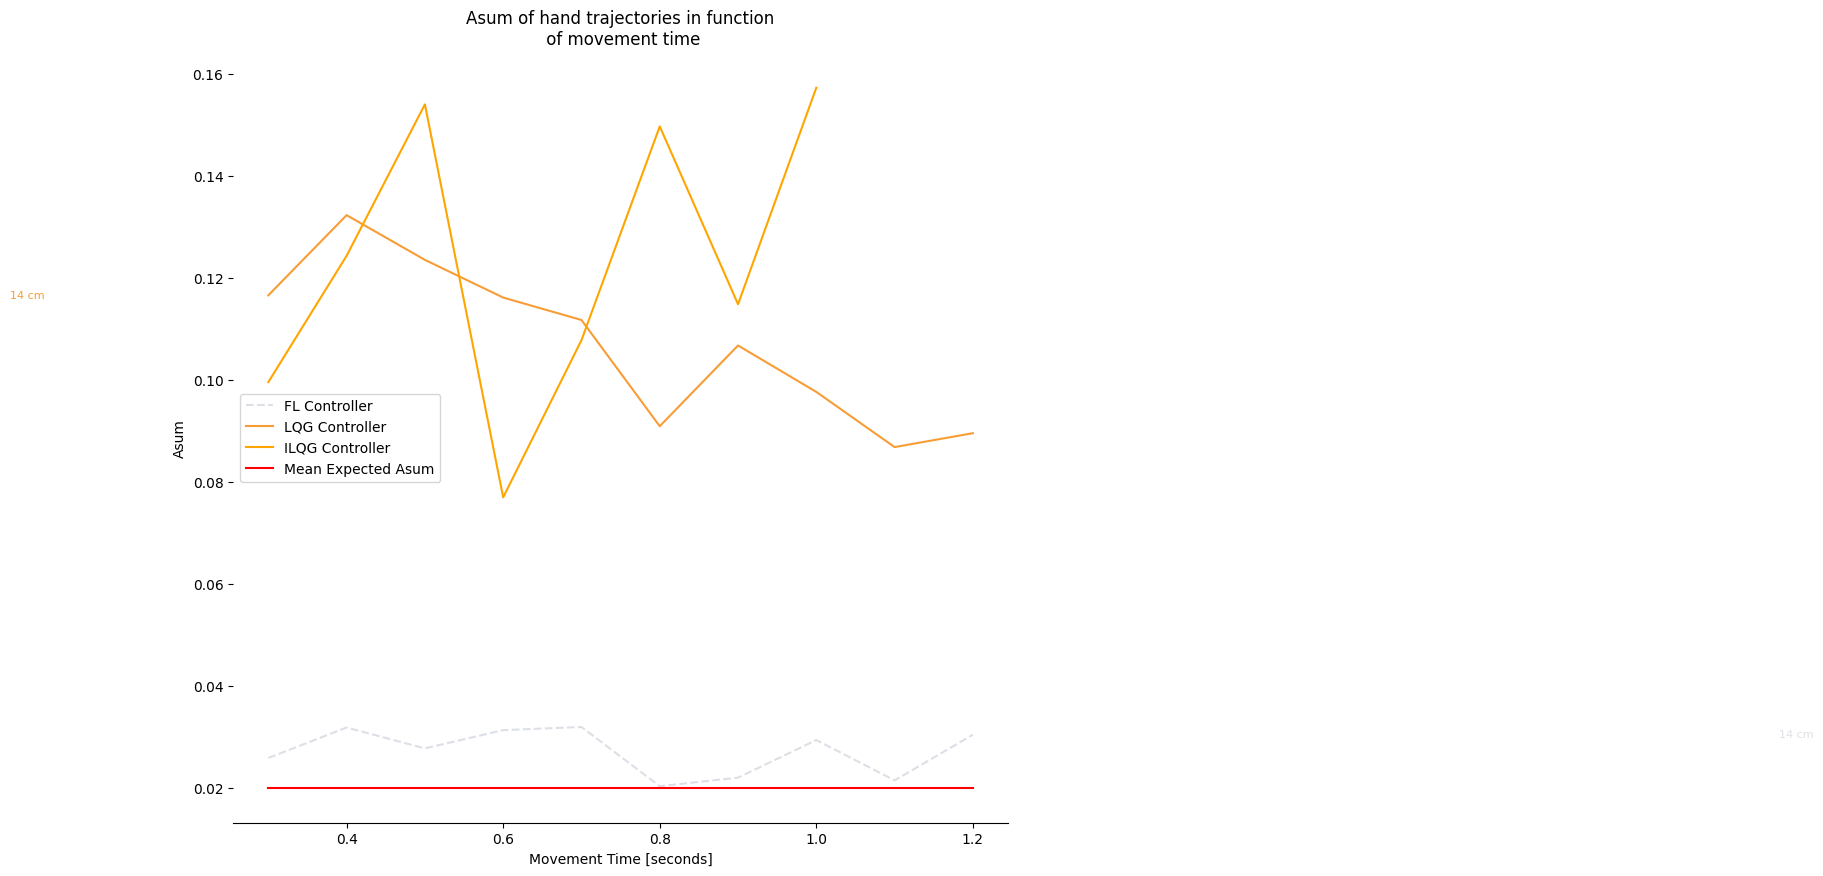

In [3]:
DurationArray = np.linspace(0.3,1.2,10)
MovementArray = [14]

Asum(MovementArray,DurationArray,Integration,"Asum",Noise = 1e-6)
plt.plot(DurationArray,np.ones(len(DurationArray))*0.02,color = "red", label = "Mean Expected Asum")
plt.legend()
plt.legend()